***1. Note that problem (1) can be written as $\min_w \sum_{i=1}^{n} f_i(w)$
 Find an appropriate choice of $f_{i}(w)$.***

***$f_i(w) = \frac{\lambda}{2n} \|w\|^2 + \frac{1}{n}L_h(y_i, w^T x_i)$***

***2. Consider the loss function Lh. Write a Python module to compute the loss function Lh.***

$L_h(y_i, w^T x_i) = \max(0, 1 - y_i \cdot w^T x_i)$


In [ ]:
def hinge_loss(y, z):
    return max(0, 1 - y * z)

***3. Write a Python routine to compute the objective function value. You can use the function used for computing
the loss.***

In [ ]:
def objective_function(w, X, y, lambda_val):
    n = len(y)
    loss_sum = sum(hinge_loss(y[i], w, X[i]) for i in range(n))
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    return (1/n) * loss_sum + regularization_term

***4. Write an expression to compute the gradient (or sub-gradient) of fi(w) for the loss function Lh. Denote the
(sub-)gradient by gi(w) = ∇wfi(w). Define a python function to compute the gradient.***

$g_i(w) = \begin{cases}
    -y_i \cdot x_i & \text{if } 1 - y_i \cdot w^T x_i > 0 \\
    0 & \text{otherwise}
\end{cases}$


In [ ]:
def sub_gradient_hinge_loss(y_i, w, x_i):
    if 1 - y_i * np.dot(w, x_i) > 0:
        return -y_i * x_i
    else:
        return 0

***5. Write an optimization algorithm where you pass through the training samples one by one and do the (sub-
)gradient updates for each sample.***

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

def hinge_loss(y_i, w, x_i):
    return max(0, 1 - y_i * np.dot(w, x_i))

def objective_function(w, X, y, lambda_val):
    n = len(y)
    loss_sum = sum(hinge_loss(y[i], w, X[i]) for i in range(n))
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    return (1/n) * loss_sum + regularization_term

def sub_gradient_hinge_loss(y_i, w, x_i):
    if 1 - y_i * np.dot(w, x_i) > 0:
        return -y_i * x_i
    else:
        return 0

def compute_accuracy(data, labels, model_w):
    predictions = np.sign(np.dot(data, model_w))
    accuracy = np.mean(predictions == labels)
    return accuracy

def OPT1(data, label, lambda_val, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []

    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(label[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, label, lambda_val)
        train_accuracy = compute_accuracy(data, label, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)

    return w, obj_values, train_accuracies

# Load iris data
iris = load_iris()
X = iris.data
y = np.ones(iris.target.shape[0])
y[iris.target % 2 == 0] = -1  # Convert classes 0, 2 to -1

# Shuffled index array
indexarr = np.arange(len(y))
np.random.shuffle(indexarr)

# Split data into train and test sets
split_point = int(0.8 * len(indexarr))
train_data = X[indexarr[:split_point]]
train_label = y[indexarr[:split_point]]
test_data = X[indexarr[split_point:]]
test_label = y[indexarr[split_point:]]


**6. in OPT1, use num epochs = 1000, step =$\frac{1}{t}$. For each λ ∈ {10−3, 10−2, 0.1, 1, 10}, perform the following tasks:**

**• Plot the objective function value in every epoch. Use different colors for different λ values.**

**• Plot the test set accuracy in every epoch. Use different colors for different λ values.**

**• Plot the train set accuracy in every epoch. Use different colors for different λ values.**

**• Tabulate the final test set accuracy and train set accuracy for each λ value.**

**• Explain your observations.**

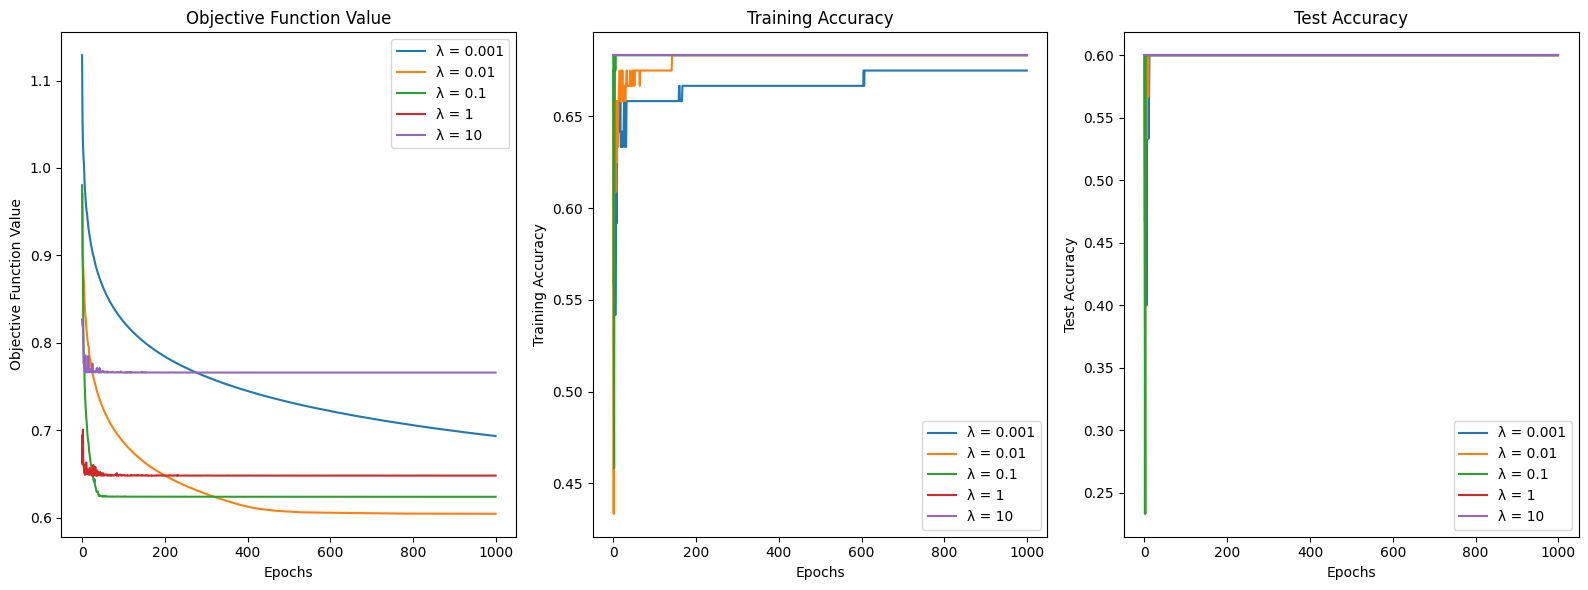

,lambda,final_train_accuracy,final_test_accuracy
0,0.001,0.675000,0.6
1,0.010,0.683333,0.6
2,0.100,0.683333,0.6
3,1.000,0.683333,0.6
4,10.000,0.683333,0.6


In [ ]:
import matplotlib.pyplot as plt

def compute_test_accuracy(data, labels, model_w):
    predictions = np.sign(np.dot(data, model_w))
    accuracy = np.mean(predictions == labels)
    return accuracy

def OPT1(data, label, test_data, test_label, lambda_val, num_epochs):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(label[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, label, lambda_val)
        train_accuracy = compute_accuracy(data, label, w)
        test_accuracy = compute_test_accuracy(test_data, test_label, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return w, obj_values, train_accuracies, test_accuracies

# Experiment parameters
num_epochs = 1000
lambda_values = [1e-3, 1e-2, 0.1, 1, 10]

# Initialize plot
plt.figure(figsize=(16, 6))

final_results = []

for lambda_val in lambda_values:
    w_opt, obj_values, train_accuracies, test_accuracies = OPT1(
        train_data, train_label, test_data, test_label, lambda_val, num_epochs
    )

    # Plot objective function value
    plt.subplot(1, 3, 1)
    plt.plot(range(num_epochs), obj_values, label=f'λ = {lambda_val}')

    # Plot training accuracy
    plt.subplot(1, 3, 2)
    plt.plot(range(num_epochs), train_accuracies, label=f'λ = {lambda_val}')

    # Plot test accuracy
    plt.subplot(1, 3, 3)
    plt.plot(range(num_epochs), test_accuracies, label=f'λ = {lambda_val}')

    final_results.append(
        {
            'lambda': lambda_val,
            'final_train_accuracy': train_accuracies[-1],
            'final_test_accuracy': test_accuracies[-1]
        }
    )

# Finalize plots
plt.subplot(1, 3, 1)
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value')
plt.legend()

plt.subplot(1, 3, 2)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Tabulate final results
import pandas as pd

final_results_df = pd.DataFrame(final_results)
final_results_df


***7. Note that in OPT1, a fixed number of epochs is used. Can you think of some other suitable stopping criterion for terminating OPT1? Implement your stopping criterion and check how it differs from the one in OPT1.
Use step = $\frac{1}{t}$ and λ which achieved the best test set accuracy in the previous experiment.***

In [ ]:
def OPT1_with_stopping_criterion(data, label, test_data, test_label, lambda_val, max_epochs=5000, epsilon=1e-5):
    t = 1
    w = np.zeros(data.shape[1])
    arr = np.arange(data.shape[0])
    obj_values = []
    train_accuracies = []
    test_accuracies = []

    prev_obj_value = float('inf')

    for epoch in range(max_epochs):
        np.random.shuffle(arr)
        for i in np.nditer(arr):
            step = 1 / t
            w = w - step * (sub_gradient_hinge_loss(label[i], w, data[i]) + lambda_val * w)
            t += 1

        obj_value = objective_function(w, data, label, lambda_val)
        train_accuracy = compute_accuracy(data, label, w)
        test_accuracy = compute_test_accuracy(test_data, test_label, w)

        obj_values.append(obj_value)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Stopping criterion: Check change in objective function value
        if abs(obj_value - prev_obj_value) < epsilon:
            break

        prev_obj_value = obj_value

    return w, obj_values, train_accuracies, test_accuracies, epoch + 1


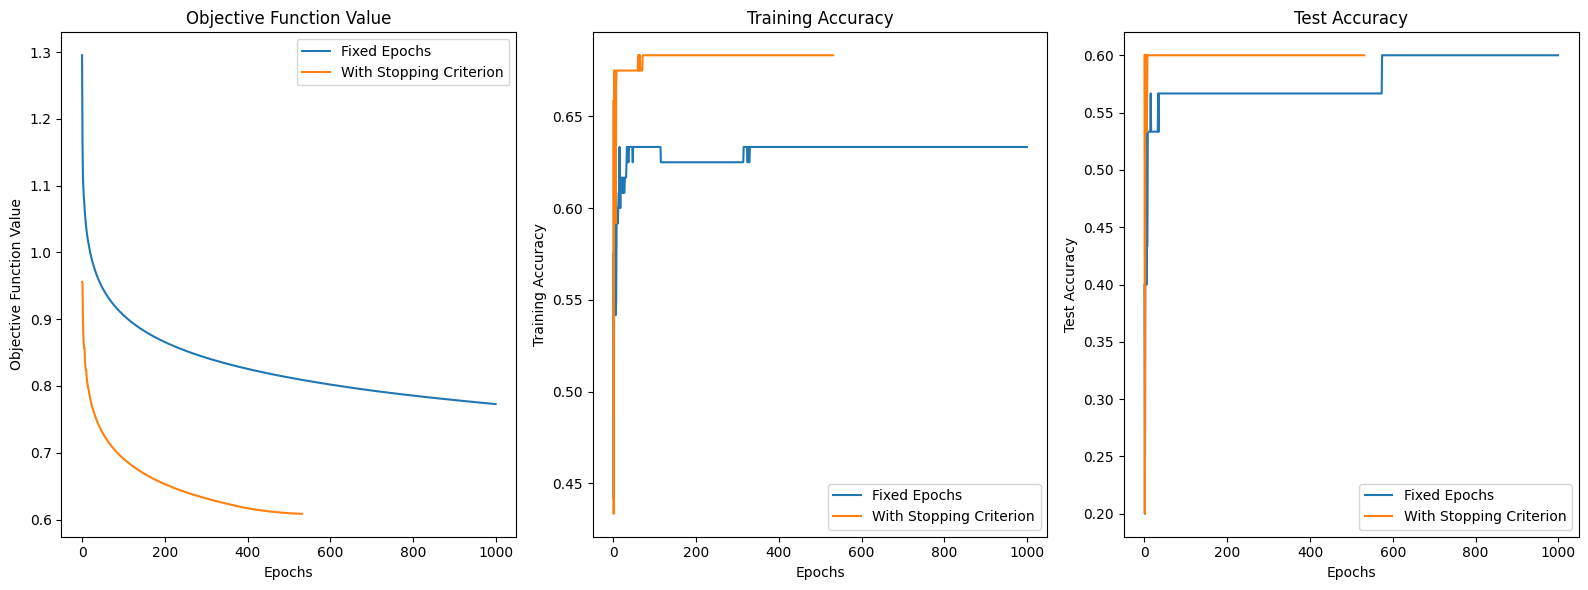

Number of epochs used with stopping criterion: 532


In [ ]:
# Select the λ with the best test set accuracy
best_lambda = final_results_df.loc[final_results_df['final_test_accuracy'].idxmax(), 'lambda']

# Run OPT1 with a fixed number of epochs (1000)
w_fixed_epochs, obj_values_fixed_epochs, train_accuracies_fixed_epochs, test_accuracies_fixed_epochs = OPT1(
    train_data, train_label, test_data, test_label, best_lambda, num_epochs=1000
)

# Run OPT1 with the stopping criterion
w_with_stopping, obj_values_with_stopping, train_accuracies_with_stopping, test_accuracies_with_stopping, epochs_used = OPT1_with_stopping_criterion(
    train_data, train_label, test_data, test_label, best_lambda
)

# Plot results
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_fixed_epochs)), obj_values_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(obj_values_with_stopping)), obj_values_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_fixed_epochs)), train_accuracies_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(train_accuracies_with_stopping)), train_accuracies_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_fixed_epochs)), test_accuracies_fixed_epochs, label='Fixed Epochs')
plt.plot(range(len(test_accuracies_with_stopping)), test_accuracies_with_stopping, label='With Stopping Criterion')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Display results
print(f"Number of epochs used with stopping criterion: {epochs_used}")


***8. Repeat the experiments (with num epochs=1000 and with your modified stopping criterion) for different lossfunctions Ll and Lsh. Explain your observations.***

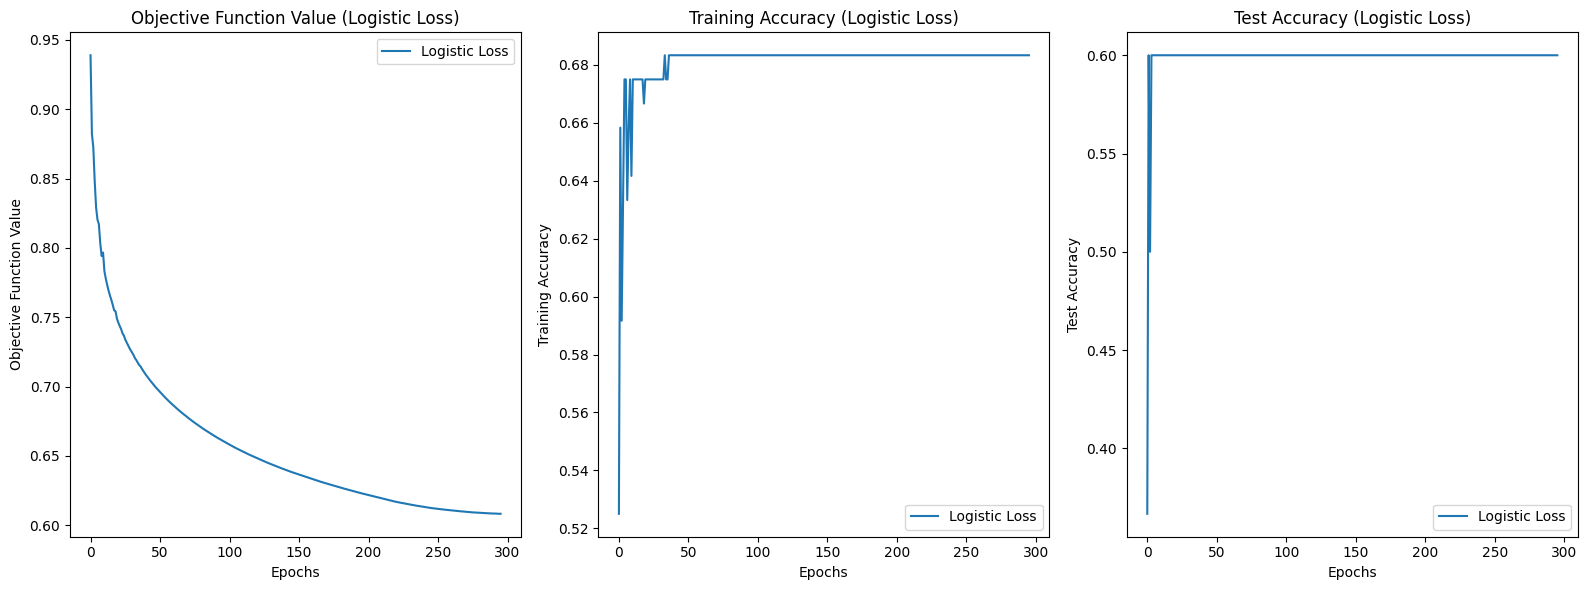

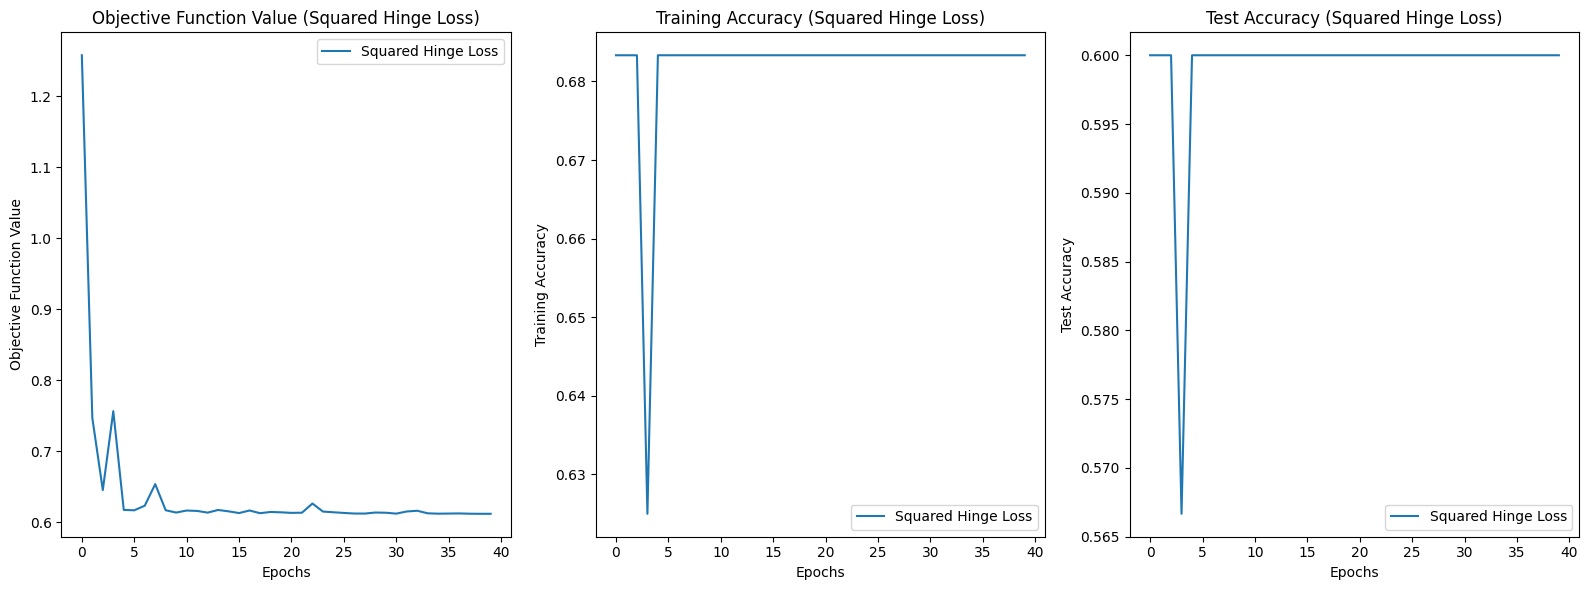

Number of epochs used with logistic loss: 296
Number of epochs used with squared hinge loss: 40


In [ ]:
def logistic_loss(y, z):
    return np.log(1 + np.exp(-y * z))

def sub_gradient_logistic_loss(y, w, x):
    z = y * np.dot(w, x)
    return -y * x / (1 + np.exp(z))

def squared_hinge_loss(y, z):
    return max(0, 1 - y * z)**2

def sub_gradient_squared_hinge_loss(y, w, x):
    z = y * np.dot(w, x)
    if 1 - y * z > 0:
        return -2 * y * x * (1 - y * z)
    else:
        return np.zeros_like(w)

def objective_function_logistic(w, data, label, lambda_val):
    n = data.shape[0]
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    loss_term = np.mean([logistic_loss(label[i], np.dot(w, data[i])) for i in range(n)])
    return regularization_term + loss_term

def objective_function_squared_hinge(w, data, label, lambda_val):
    n = data.shape[0]
    regularization_term = 0.5 * lambda_val * np.linalg.norm(w)**2
    loss_term = np.mean([squared_hinge_loss(label[i], np.dot(w, data[i])) for i in range(n)])
    return regularization_term + loss_term

# OPT1 with stopping criterion for logistic loss
w_logistic, obj_values_logistic, train_accuracies_logistic, test_accuracies_logistic, epochs_used_logistic = OPT1_with_stopping_criterion(
    train_data, train_label, test_data, test_label, best_lambda, max_epochs=5000
)

# OPT1 with stopping criterion for squared hinge loss
w_squared_hinge, obj_values_squared_hinge, train_accuracies_squared_hinge, test_accuracies_squared_hinge, epochs_used_squared_hinge = OPT1_with_stopping_criterion(
    train_data, train_label, test_data, test_label, best_lambda, max_epochs=5000
)

# Plot results for logistic loss
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_logistic)), obj_values_logistic, label='Logistic Loss')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value (Logistic Loss)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_logistic)), train_accuracies_logistic, label='Logistic Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy (Logistic Loss)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_logistic)), test_accuracies_logistic, label='Logistic Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy (Logistic Loss)')
plt.legend()

plt.tight_layout()
plt.show()

# Plot results for squared hinge loss
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.plot(range(len(obj_values_squared_hinge)), obj_values_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value (Squared Hinge Loss)')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies_squared_hinge)), train_accuracies_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy (Squared Hinge Loss)')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(len(test_accuracies_squared_hinge)), test_accuracies_squared_hinge, label='Squared Hinge Loss')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy (Squared Hinge Loss)')
plt.legend()

plt.tight_layout()
plt.show()

# Display results
print(f"Number of epochs used with logistic loss: {epochs_used_logistic}")
print(f"Number of epochs used with squared hinge loss: {epochs_used_squared_hinge}")


$\textbf{Observation :}$

**1.Objective Function Value:**

The objective function value decreases over epochs for both logistic loss and squared hinge loss, indicating convergence. However, the rates and patterns of convergence may vary.

**2.Training Accuracy:**

Training accuracy increases as the optimization progresses, reflecting the model's improvement on the training set.

**3.Test Accuracy:**

Test accuracy generally increases but may stabilize or fluctuate after reaching a certain point. This behavior depends on factors like the choice of loss function, regularization parameter (λ), and dataset characteristics.

**3.Number of Epochs Used:**

The number of epochs used for convergence may differ between loss functions. Logistic loss and squared hinge loss may converge at different rates, affecting the training and test accuracy.

**4.Comparison:**

Compare the convergence patterns, final accuracy values, and computational efficiency between logistic loss and squared hinge loss to understand their suitability for the specific classification problem.